In [2]:
from aeon.classification.convolution_based import HydraClassifier
from aeon.classification.convolution_based import Arsenal
from aeon.classification.convolution_based import RocketClassifier
from aeon.classification.convolution_based import MultiRocketHydraClassifier
import numpy as np
import pandas as pd
import glob
import json
from scipy.signal import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

S dataset - Back Front - Age Prediction

Hydra Classifier

Accuracy: 0.7


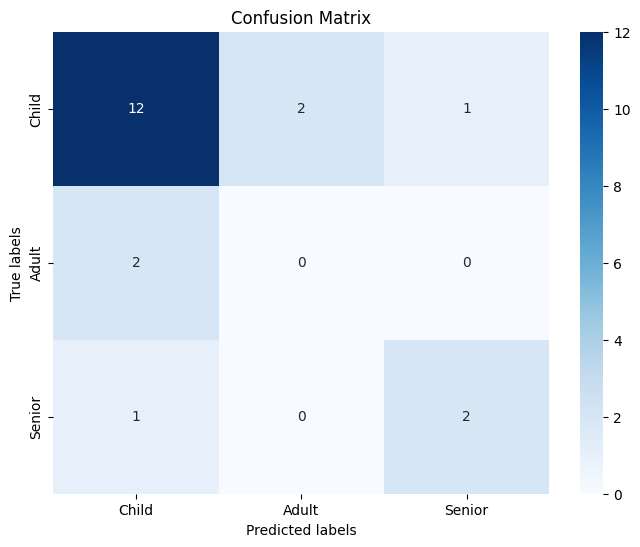

Classification Report:
               precision    recall  f1-score   support

       Child       0.80      0.80      0.80        15
       Adult       0.00      0.00      0.00         2
      Senior       0.67      0.67      0.67         3

    accuracy                           0.70        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.70      0.70      0.70        20



In [3]:
# Load and preprocess data
def load_data(directory, start_video_id):
    file_paths = glob.glob(directory + '/*.json')
    dfs = []
    video_id_counter = start_video_id

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)
        df = pd.json_normalize(data)
        df.insert(df.columns.get_loc('image_id'), 'video_id', video_id_counter)
        video_id_counter += 1
        dfs.append(df)

    final_df = pd.concat(dfs, ignore_index=True)
    keypoints_df = final_df['keypoints'].apply(pd.Series)
    col_names = ['keypoints_{}'.format(i+1) for i in range(keypoints_df.shape[1])]
    keypoints_df.columns = col_names
    selected_keypoints = keypoints_df.iloc[:, :51]
    final_df = pd.concat([final_df, selected_keypoints], axis=1)

    return final_df

def resample_signal(x):
    x = np.array(x)
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    return resample(x, 50, window='hamming', axis=0).flatten().tolist()

def to_nested(df):
    nested_df = pd.DataFrame({
        'keypoints': df['keypoints'],  
        'label': df['label']  
    })
    return nested_df

# Load data for different categories
child_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Children_back_front'
adult_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Adult_back_front'
senior_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Senior_back_front'

child_data = load_data(child_directory, start_video_id=1)
adult_data = load_data(adult_directory, start_video_id=21)  # Start from 21
senior_data = load_data(senior_directory, start_video_id=41)  # Start from 41

# Assign labels
child_data['label'] = 1
adult_data['label'] = 2
senior_data['label'] = 3

# Combine data
data = pd.concat([child_data, adult_data, senior_data])


grouped_data = data.groupby('video_id').agg({
    'keypoints': lambda x: np.sum(x.tolist(), axis=0),  # Sum keypoints lists
    'label': 'first'
}).reset_index()

# Resample keypoints
grouped_data['keypoints'] = grouped_data['keypoints'].apply(resample_signal)

nested_grouped_data = to_nested(grouped_data)

# Exchange data format
X = np.array(nested_grouped_data['keypoints'].tolist())
y = np.array(nested_grouped_data['label'])


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data 
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Training on Hydra Classifier
classifier =  HydraClassifier(n_kernels=8, n_groups=64, n_jobs=1, random_state=42)
classifier.fit(X_train, y_train)


# Prediction
y_pred = classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Child', 'Adult', 'Senior'],
            yticklabels=['Child', 'Adult', 'Senior'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Child', 'Adult', 'Senior'])
print("Classification Report:\n", class_report)


Arsenal Classifier

Accuracy: 0.7


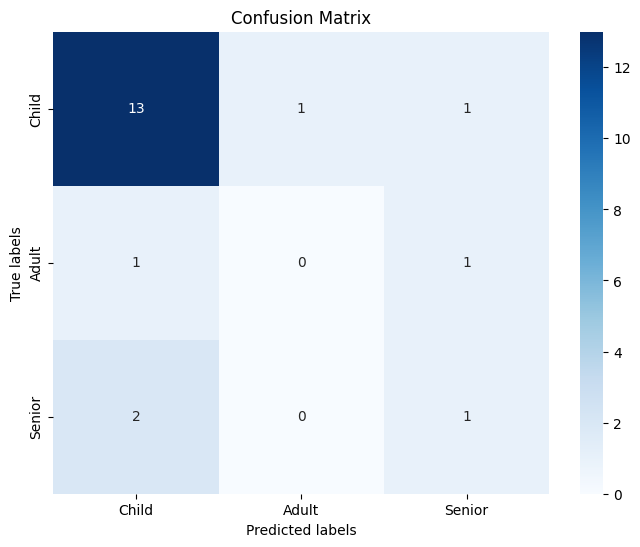

Classification Report:
               precision    recall  f1-score   support

       Child       0.81      0.87      0.84        15
       Adult       0.00      0.00      0.00         2
      Senior       0.33      0.33      0.33         3

    accuracy                           0.70        20
   macro avg       0.38      0.40      0.39        20
weighted avg       0.66      0.70      0.68        20



In [4]:
# Load and preprocess data
def load_data(directory, start_video_id):
    file_paths = glob.glob(directory + '/*.json')
    dfs = []
    video_id_counter = start_video_id

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)
        df = pd.json_normalize(data)
        df.insert(df.columns.get_loc('image_id'), 'video_id', video_id_counter)
        video_id_counter += 1
        dfs.append(df)

    final_df = pd.concat(dfs, ignore_index=True)
    keypoints_df = final_df['keypoints'].apply(pd.Series)
    col_names = ['keypoints_{}'.format(i+1) for i in range(keypoints_df.shape[1])]
    keypoints_df.columns = col_names
    selected_keypoints = keypoints_df.iloc[:, :51]
    final_df = pd.concat([final_df, selected_keypoints], axis=1)

    return final_df

def resample_signal(x):
    x = np.array(x)
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    return resample(x, 50, window='hamming', axis=0).flatten().tolist()

def to_nested(df):
    nested_df = pd.DataFrame({
        'keypoints': df['keypoints'],  
        'label': df['label']  
    })
    return nested_df

# Load data for different categories
child_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Children_back_front'
adult_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Adult_back_front'
senior_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Senior_back_front'

child_data = load_data(child_directory, start_video_id=1)
adult_data = load_data(adult_directory, start_video_id=21)  # Start from 21
senior_data = load_data(senior_directory, start_video_id=41)  # Start from 41

# Assign labels
child_data['label'] = 1
adult_data['label'] = 2
senior_data['label'] = 3

# Combine data
data = pd.concat([child_data, adult_data, senior_data])


grouped_data = data.groupby('video_id').agg({
    'keypoints': lambda x: np.sum(x.tolist(), axis=0),  # Sum keypoints lists
    'label': 'first'
}).reset_index()

# Resample keypoints
grouped_data['keypoints'] = grouped_data['keypoints'].apply(resample_signal)

nested_grouped_data = to_nested(grouped_data)

# Exchange data format
X = np.array(nested_grouped_data['keypoints'].tolist())
y = np.array(nested_grouped_data['label'])


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Training on Arsenal Classifier
classifier =  Arsenal(num_kernels=2000, n_estimators=25, rocket_transform='rocket', 
                      max_dilations_per_kernel=32, n_features_per_kernel=4, time_limit_in_minutes=0.0, 
                      contract_max_n_estimators=100, n_jobs=1, random_state=101)
classifier.fit(X_train, y_train)


# Prediction
y_pred = classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Child', 'Adult', 'Senior'],
            yticklabels=['Child', 'Adult', 'Senior'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Child', 'Adult', 'Senior'])
print("Classification Report:\n", class_report)


Rocket Classifier

Accuracy: 0.65


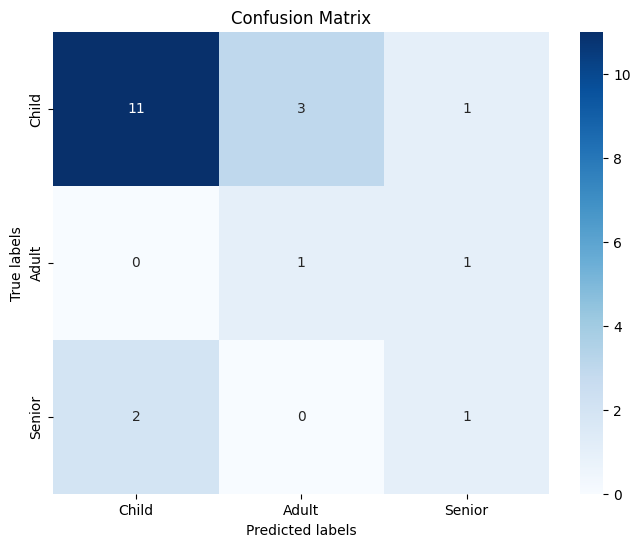

Classification Report:
               precision    recall  f1-score   support

       Child       0.85      0.73      0.79        15
       Adult       0.25      0.50      0.33         2
      Senior       0.33      0.33      0.33         3

    accuracy                           0.65        20
   macro avg       0.48      0.52      0.48        20
weighted avg       0.71      0.65      0.67        20



In [5]:
# Load and preprocess data
def load_data(directory, start_video_id):
    file_paths = glob.glob(directory + '/*.json')
    dfs = []
    video_id_counter = start_video_id

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)
        df = pd.json_normalize(data)
        df.insert(df.columns.get_loc('image_id'), 'video_id', video_id_counter)
        video_id_counter += 1
        dfs.append(df)

    final_df = pd.concat(dfs, ignore_index=True)
    keypoints_df = final_df['keypoints'].apply(pd.Series)
    col_names = ['keypoints_{}'.format(i+1) for i in range(keypoints_df.shape[1])]
    keypoints_df.columns = col_names
    selected_keypoints = keypoints_df.iloc[:, :51]
    final_df = pd.concat([final_df, selected_keypoints], axis=1)

    return final_df

def resample_signal(x):
    x = np.array(x)
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    return resample(x, 50, window='hamming', axis=0).flatten().tolist()

def to_nested(df):
    nested_df = pd.DataFrame({
        'keypoints': df['keypoints'],  
        'label': df['label']  
    })
    return nested_df

# Load data for different categories
child_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Children_back_front'
adult_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Adult_back_front'
senior_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Senior_back_front'

child_data = load_data(child_directory, start_video_id=1)
adult_data = load_data(adult_directory, start_video_id=21)  # Start from 21
senior_data = load_data(senior_directory, start_video_id=41)  # Start from 41

# Assign labels
child_data['label'] = 1
adult_data['label'] = 2
senior_data['label'] = 3

# Combine data
data = pd.concat([child_data, adult_data, senior_data])


grouped_data = data.groupby('video_id').agg({
    'keypoints': lambda x: np.sum(x.tolist(), axis=0),  # Sum keypoints lists
    'label': 'first'
}).reset_index()

# Resample keypoints
grouped_data['keypoints'] = grouped_data['keypoints'].apply(resample_signal)

nested_grouped_data = to_nested(grouped_data)

# Exchange data format
X = np.array(nested_grouped_data['keypoints'].tolist())
y = np.array(nested_grouped_data['label'])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data 
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Training on Rocket Classifier
classifier =  RocketClassifier(num_kernels=10000, rocket_transform='rocket', max_dilations_per_kernel=32, 
                               n_features_per_kernel=4, estimator=None, random_state=42, n_jobs=1)
classifier.fit(X_train, y_train)


# Prediction
y_pred = classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Child', 'Adult', 'Senior'],
            yticklabels=['Child', 'Adult', 'Senior'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Child', 'Adult', 'Senior'])
print("Classification Report:\n", class_report)


MultiRocketHydraClassifier

Accuracy: 0.75


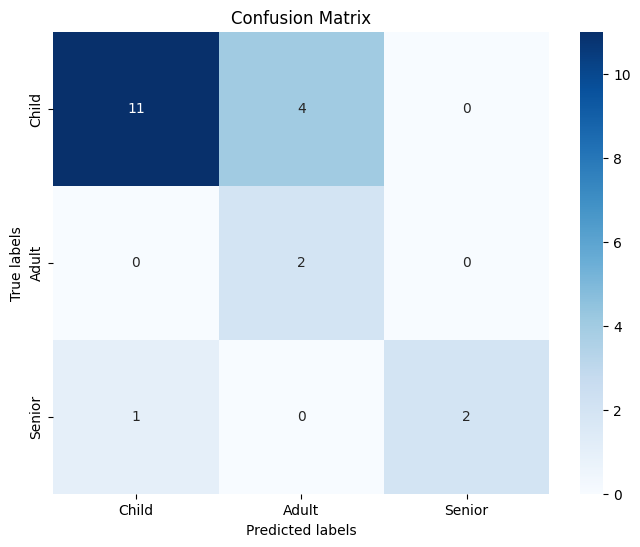

Classification Report:
               precision    recall  f1-score   support

       Child       0.92      0.73      0.81        15
       Adult       0.33      1.00      0.50         2
      Senior       1.00      0.67      0.80         3

    accuracy                           0.75        20
   macro avg       0.75      0.80      0.70        20
weighted avg       0.87      0.75      0.78        20



In [6]:
# Load and preprocess data
def load_data(directory, start_video_id):
    file_paths = glob.glob(directory + '/*.json')
    dfs = []
    video_id_counter = start_video_id

    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = json.load(file)
        df = pd.json_normalize(data)
        df.insert(df.columns.get_loc('image_id'), 'video_id', video_id_counter)
        video_id_counter += 1
        dfs.append(df)

    final_df = pd.concat(dfs, ignore_index=True)
    keypoints_df = final_df['keypoints'].apply(pd.Series)
    col_names = ['keypoints_{}'.format(i+1) for i in range(keypoints_df.shape[1])]
    keypoints_df.columns = col_names
    selected_keypoints = keypoints_df.iloc[:, :51]
    final_df = pd.concat([final_df, selected_keypoints], axis=1)

    return final_df

def resample_signal(x):
    x = np.array(x)
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    return resample(x, 50, window='hamming', axis=0).flatten().tolist()

def to_nested(df):
    nested_df = pd.DataFrame({
        'keypoints': df['keypoints'],  
        'label': df['label']  
    })
    return nested_df

# Load data for different categories
child_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Children_back_front'
adult_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Adult_back_front'
senior_directory = 'F:/Backup_drive_1201201336/Fyp_gambatee/Time Series Analysis/Age_Prediction/S_dataset/Senior_back_front'

child_data = load_data(child_directory, start_video_id=1)
adult_data = load_data(adult_directory, start_video_id=21)  # Start from 21
senior_data = load_data(senior_directory, start_video_id=41)  # Start from 41

# Assign labels
child_data['label'] = 1
adult_data['label'] = 2
senior_data['label'] = 3

# Combine data
data = pd.concat([child_data, adult_data, senior_data])


grouped_data = data.groupby('video_id').agg({
    'keypoints': lambda x: np.sum(x.tolist(), axis=0),  # Sum keypoints lists
    'label': 'first'
}).reset_index()

# Resample keypoints
grouped_data['keypoints'] = grouped_data['keypoints'].apply(resample_signal)

nested_grouped_data = to_nested(grouped_data)

# Exchange data format
X = np.array(nested_grouped_data['keypoints'].tolist())
y = np.array(nested_grouped_data['label'])


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape data 
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Training on MultiRocketHydra Classifier
classifier =  MultiRocketHydraClassifier(n_kernels=8, n_groups=64, n_jobs=1, random_state=42)
classifier.fit(X_train, y_train)


# Prediction
y_pred = classifier.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Child', 'Adult', 'Senior'],
            yticklabels=['Child', 'Adult', 'Senior'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=['Child', 'Adult', 'Senior'])
print("Classification Report:\n", class_report)
